<h2>Clustering: Country Analysis<h2>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import sys
#!{sys.executable} -m pip install seaborn
import seaborn as sns


from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [10]:
# Read the data
X = pd.read_csv("countryanalysis.csv")
X.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
X_countrynames = X['country']
X_nocountry = X.drop(['country'],axis=1)
X_nocountry.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [13]:
# Feature scaling
scaler = StandardScaler()  # Remove the mean and scale to unit variance
X_scaled = scaler.fit_transform(X_nocountry)
X_scaled = pd.DataFrame(X_scaled, columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])
X_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


Correlation among features


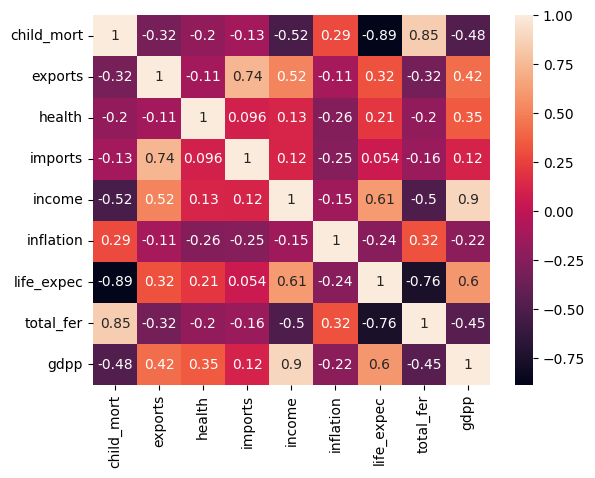

In [15]:
# Generate a heatmap of the correlations among the features
print('Correlation among features')
sns.heatmap(X_scaled.corr(),annot=True);

Co-clustering


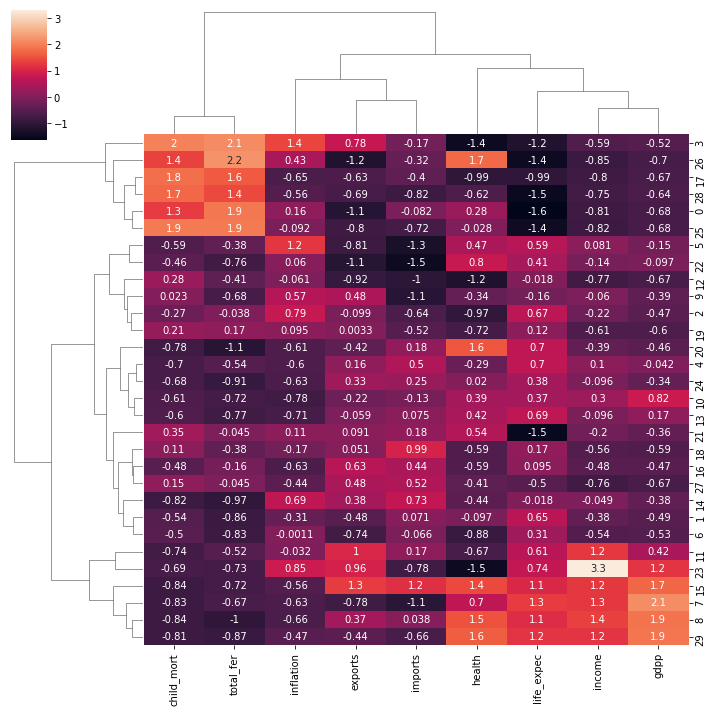

In [6]:
# Generate co-clustering
print('Co-clustering')
sns.clustermap(X_scaled.head(30),method='ward', metric='euclidean',annot=True);

In [16]:
X_colsubset = X_scaled[['child_mort', 'imports', 'gdpp']]
X_colsubset

,child_mort,imports,gdpp
0,1.291532,-0.082455,-0.679180
1,-0.538949,0.070837,-0.485623
2,-0.272833,-0.641762,-0.465376
3,2.007808,-0.165315,-0.516268
4,-0.695634,0.497568,-0.041817
...,...,...,...
162,-0.225578,0.240700,-0.546913
163,-0.526514,-1.213499,0.029323
164,-0.372315,1.380030,-0.637754
165,0.448417,-0.517472,-0.637754


<Axes: xlabel='gdpp', ylabel='child_mort'>

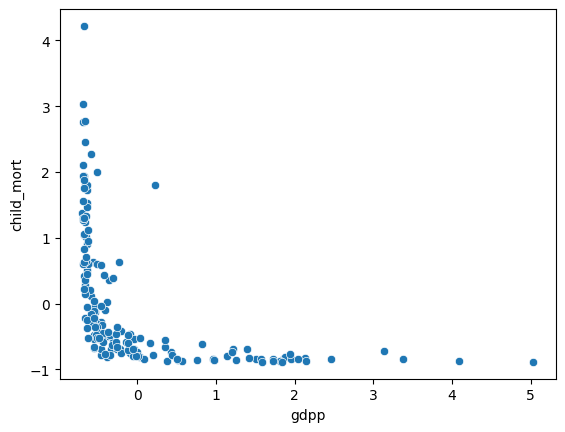

In [17]:
# Display the selected data
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = X_colsubset)

<Axes: xlabel='gdpp', ylabel='imports'>

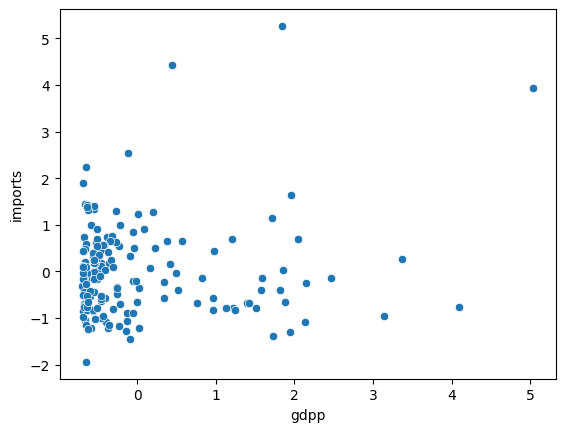

In [18]:
sns.scatterplot(x = 'gdpp', y = 'imports', data = X_colsubset)

<b>K-means Clustering</b>

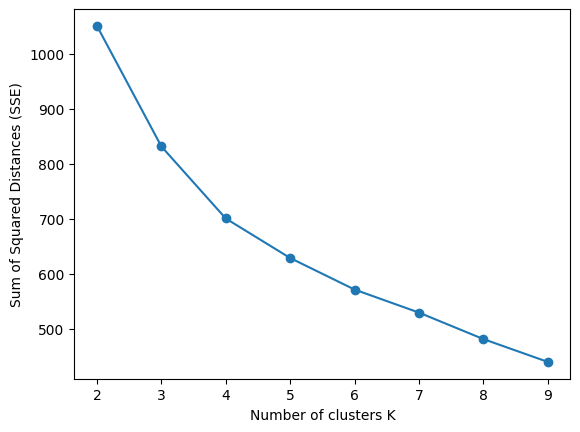

In [25]:
from sklearn.cluster import KMeans

# Select the number of clusters by means of SSE
SSE = []
range_n_clusters = range(2,10)
for nclust in range_n_clusters:
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust, 
                init='random', # or 'k-means++'
                n_init=10, 
                max_iter=100, 
                random_state=0)
    # Generate K-means clustering
    km.fit(X_scaled)
    SSE.append(km.inertia_)
    
plt.plot(range_n_clusters, SSE, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [29]:
# Generate the final K-means clustering model
km = KMeans(n_clusters=5,
            init='random',
            n_init=10, 
            max_iter=100,
            random_state=0)
cluster_labels = km.fit_predict(X_scaled)
X['kmeans_labels'] = cluster_labels
X

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,4


<Axes: xlabel='gdpp', ylabel='child_mort'>

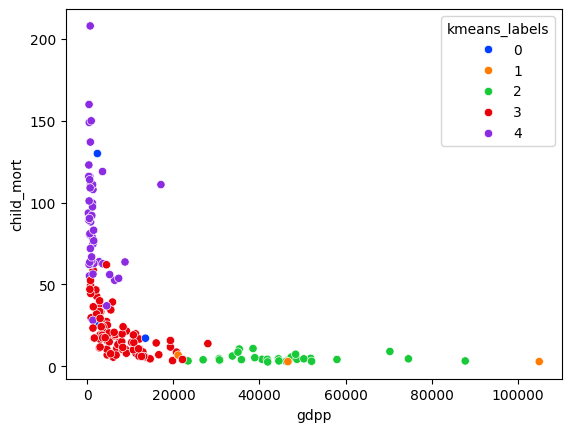

In [30]:
# Plot the features of interest
X_colsubset = X[['child_mort', 'imports', 'gdpp', 'kmeans_labels']]
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = X_colsubset, hue = 'kmeans_labels', palette = 'bright')

<Axes: xlabel='gdpp', ylabel='imports'>

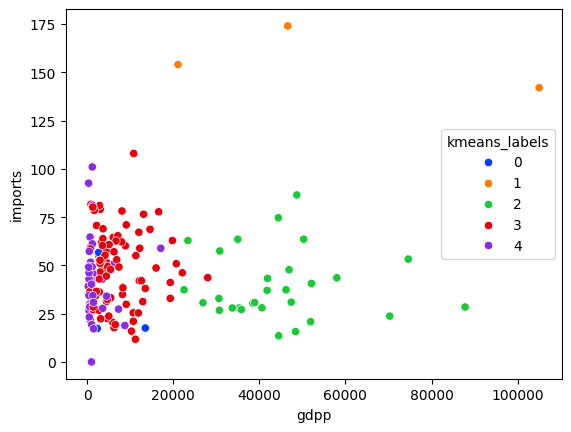

In [31]:
sns.scatterplot(x = 'gdpp', y = 'imports', data = X_colsubset, hue = 'kmeans_labels', palette = 'bright')

<b>DBSCAN</b>

In [34]:
# Selection of the size (eps) of the neighborhood
outlier_perc = []

for eps in np.linspace(0.001,3,50):  #Return evenly spaced numbers over a specified interval
    # Create the clustering model based
    dbscan = DBSCAN(eps=eps,min_samples=3)
    dbscan.fit(X_scaled)
    print(dbscan.labels_)
    # Count the percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_perc.append(perc_outliers)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -

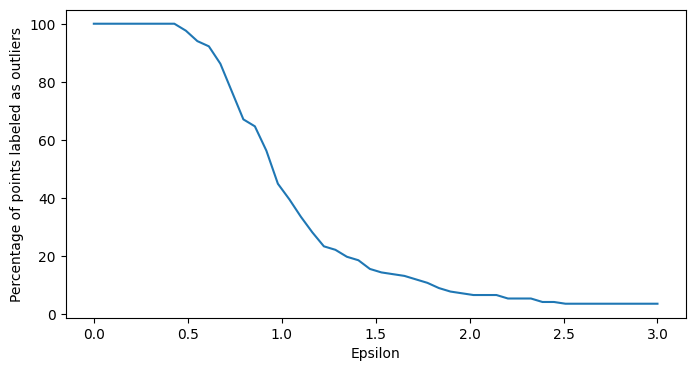

In [35]:
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_perc)
plt.ylabel("Percentage of points labeled as outliers")
plt.xlabel("Epsilon")
plt.show()

In [36]:
# Generate the final DBSCAN model
dbscan = DBSCAN(eps = 1.2, min_samples = 5)
cluster_labels = dbscan.fit_predict(X_scaled)
X['dbscan_labels'] = cluster_labels
X

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels,dbscan_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,-1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,4,-1


<Axes: xlabel='gdpp', ylabel='child_mort'>

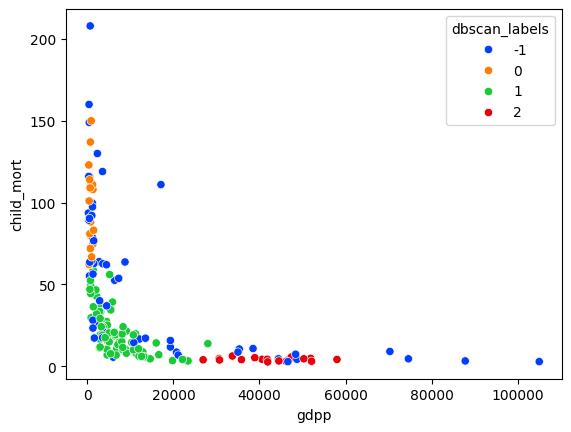

In [37]:
# Plot the features of interest
X_colsubset = X[['child_mort', 'imports', 'gdpp', 'dbscan_labels']]
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = X_colsubset, hue = 'dbscan_labels', palette = 'bright')

<Axes: xlabel='gdpp', ylabel='imports'>

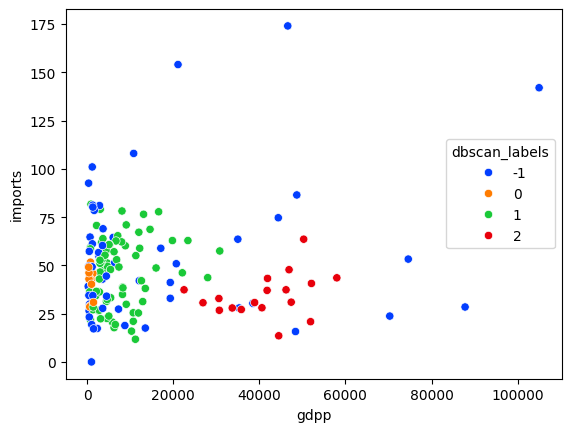

In [38]:
sns.scatterplot(x = 'gdpp', y = 'imports', data = X_colsubset, hue = 'dbscan_labels', palette = 'bright')